# <center> Regression analysis on Car sale Dataset.

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import LinearSVR
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./Car_sales (1).csv')

In [3]:
data

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


### Discriptive statistics

In [4]:
data.shape

(157, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [6]:
data.isnull().mean()*100

Manufacturer            0.000000
Model                   0.000000
Sales_in_thousands      0.000000
__year_resale_value    22.929936
Vehicle_type            0.000000
Price_in_thousands      1.273885
Engine_size             0.636943
Horsepower              0.636943
Wheelbase               0.636943
Width                   0.636943
Length                  0.636943
Curb_weight             1.273885
Fuel_capacity           0.636943
Fuel_efficiency         1.910828
Latest_Launch           0.000000
Power_perf_factor       1.273885
dtype: float64

#### filling the null values by interpolation method

In [7]:
for i in data.columns:
    if data[i].dtype!='object':
        data[i].interpolate(inplace=True)

In [8]:
data.isnull().mean()*100

Manufacturer           0.0
Model                  0.0
Sales_in_thousands     0.0
__year_resale_value    0.0
Vehicle_type           0.0
Price_in_thousands     0.0
Engine_size            0.0
Horsepower             0.0
Wheelbase              0.0
Width                  0.0
Length                 0.0
Curb_weight            0.0
Fuel_capacity          0.0
Fuel_efficiency        0.0
Latest_Launch          0.0
Power_perf_factor      0.0
dtype: float64

### EDA

### Histogram

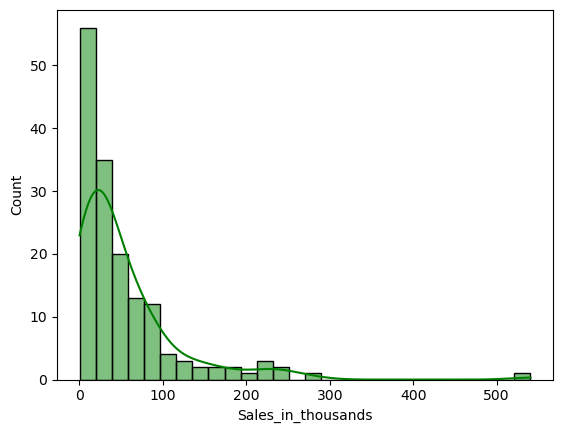

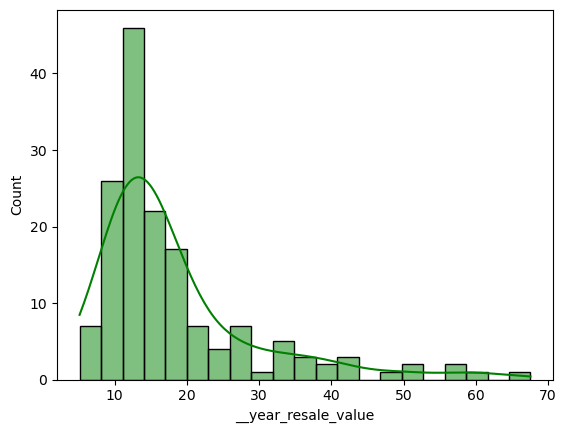

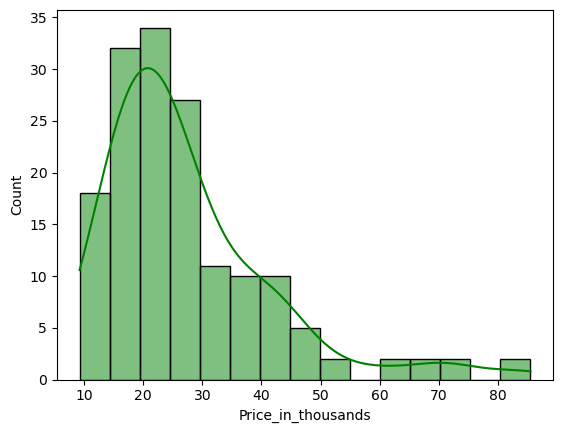

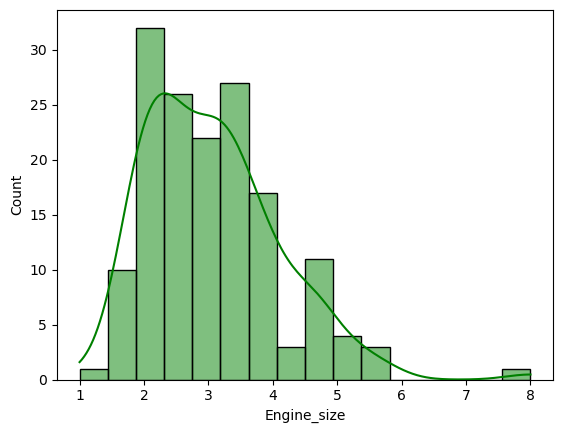

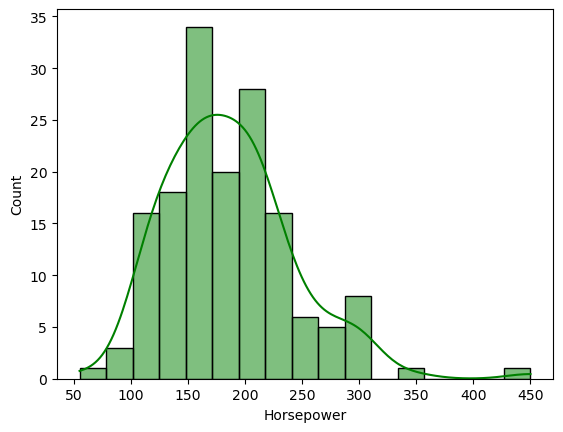

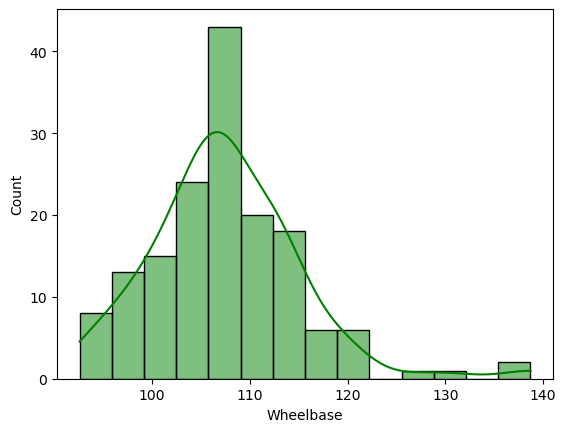

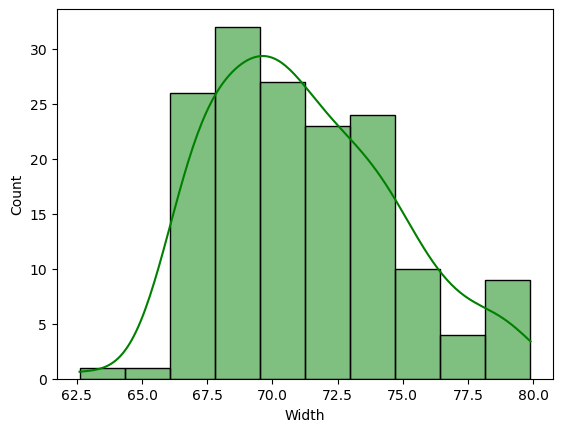

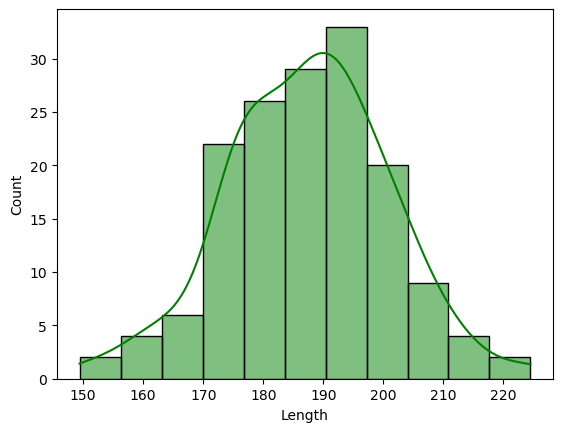

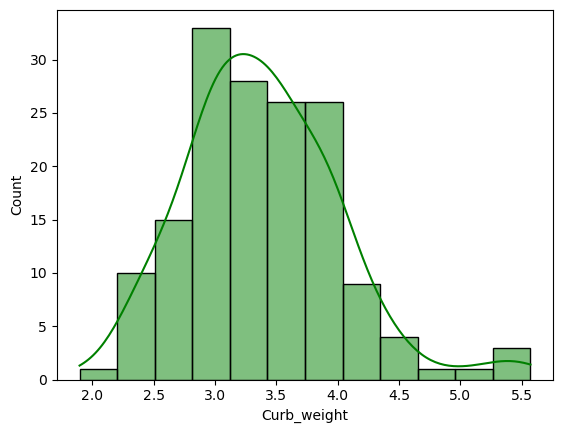

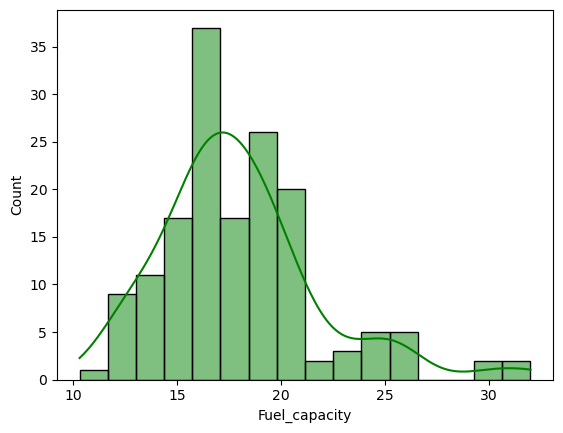

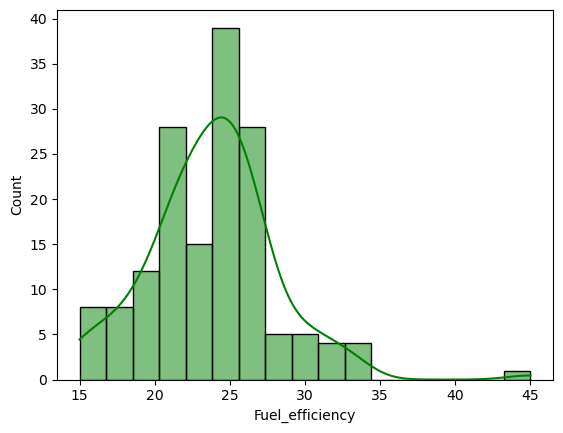

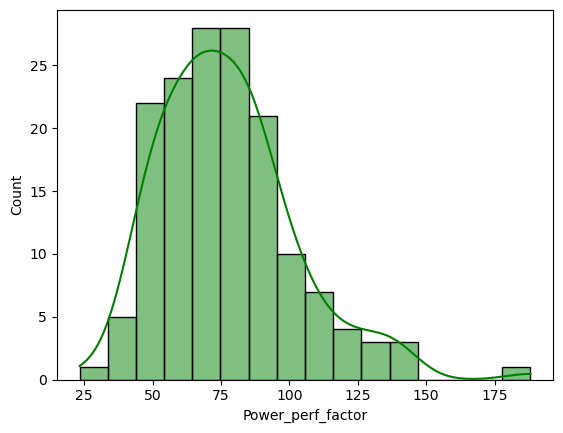

In [9]:
for i in data.columns:
    if data[i].dtypes!='object':
        sns.histplot(x=data[i],kde=True,color='green')
        plt.show()

### Box plot

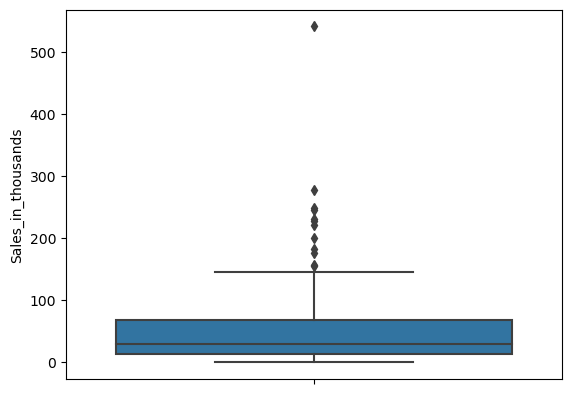

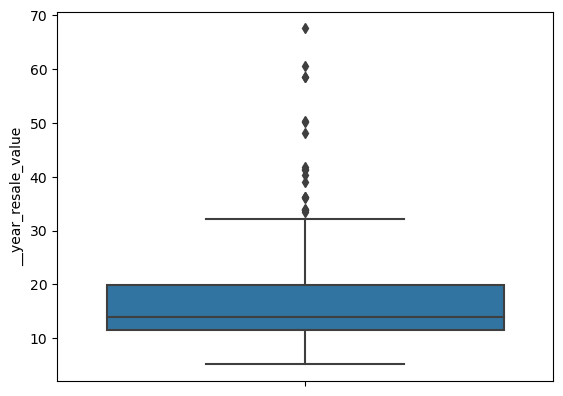

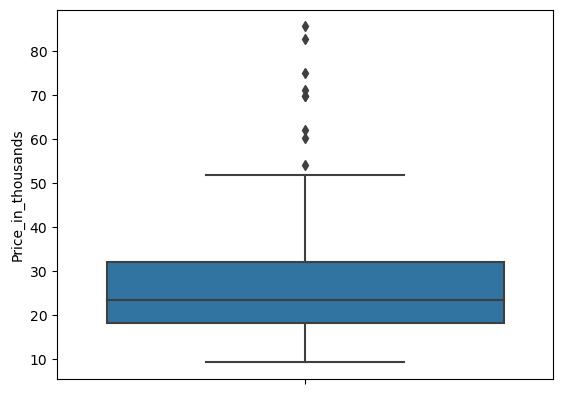

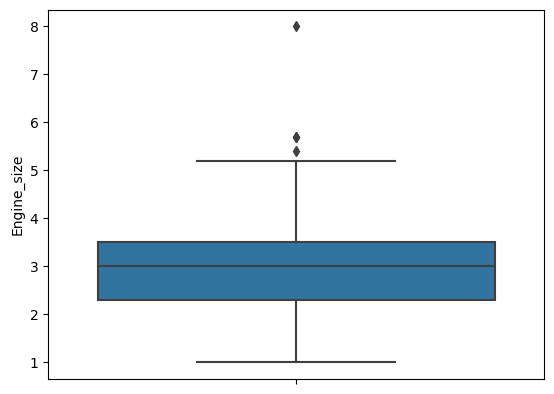

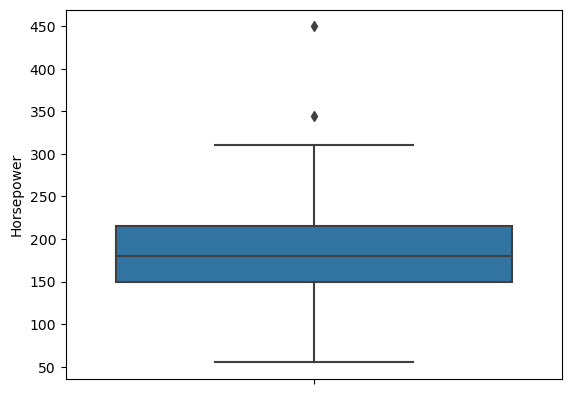

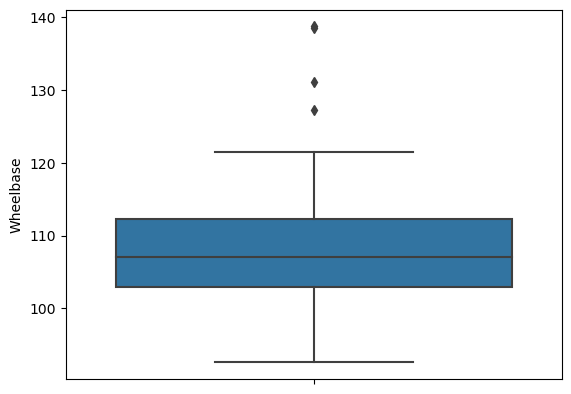

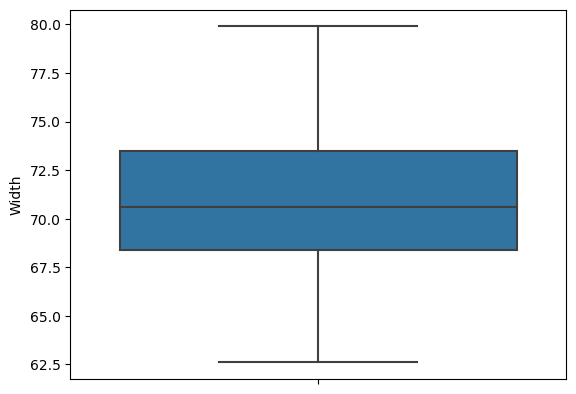

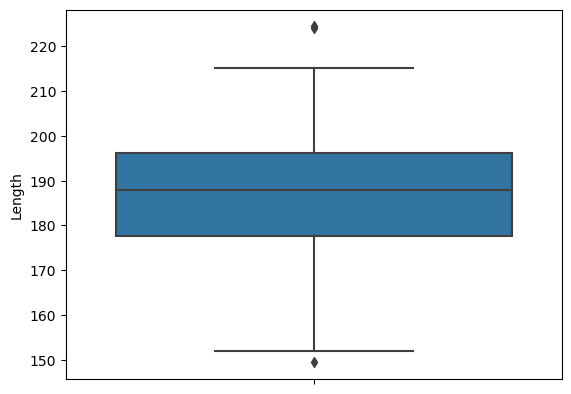

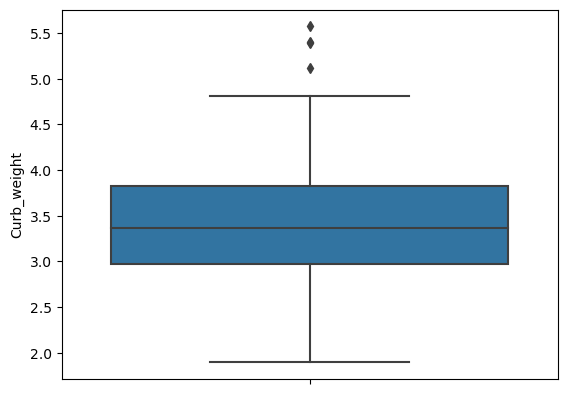

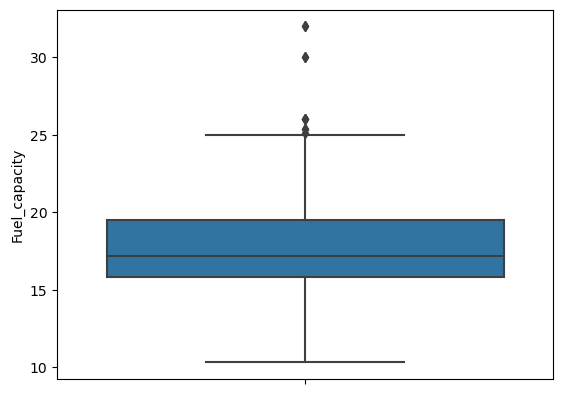

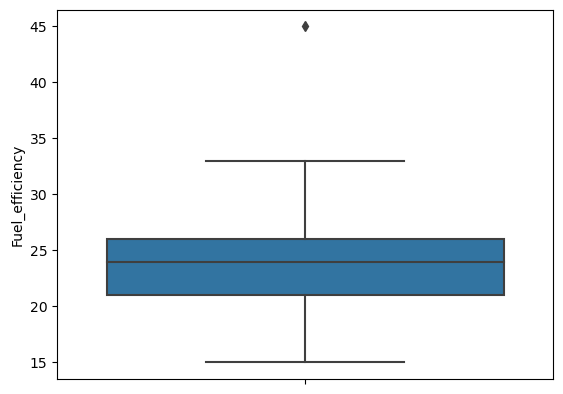

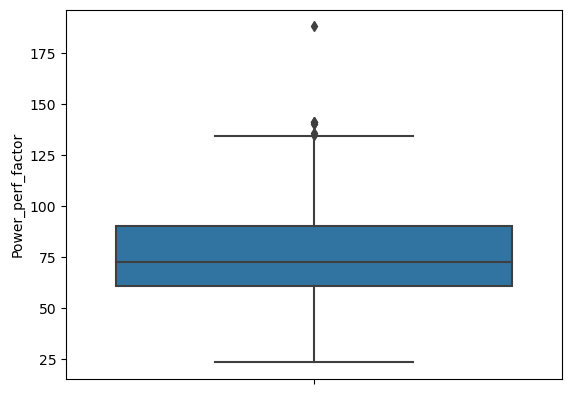

In [10]:
for i in data.columns:
    if data[i].dtype!='object':
        sns.boxplot(y=data[i])
        plt.show()

### Heat map

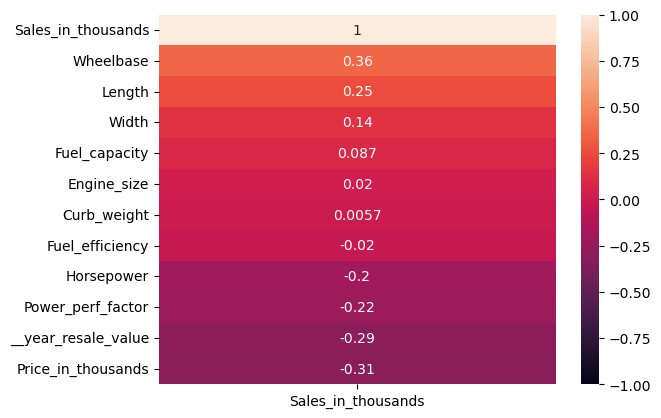

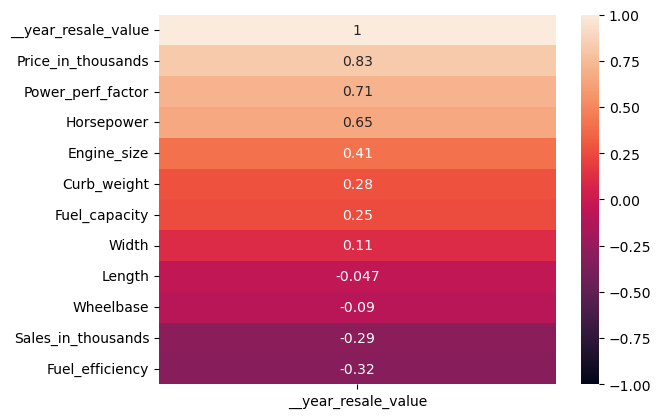

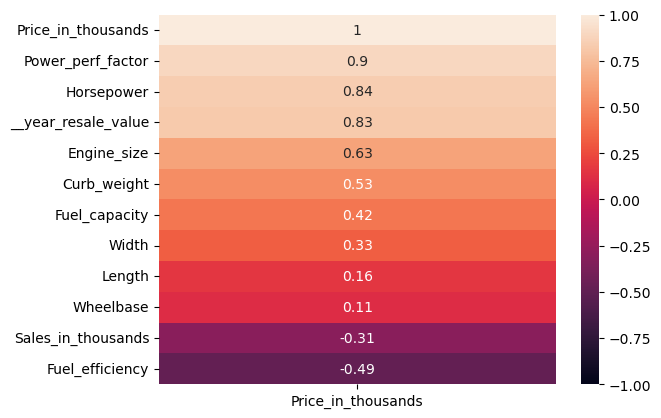

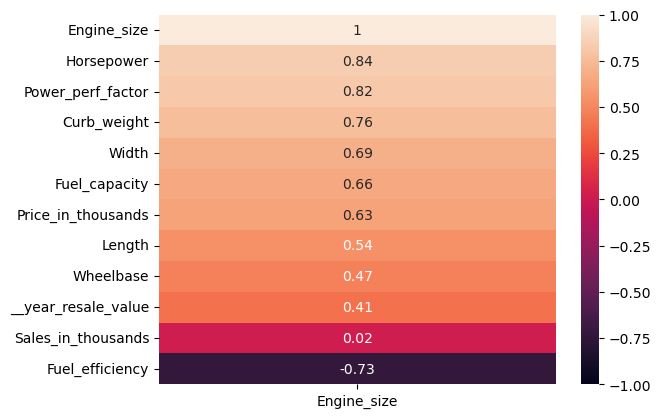

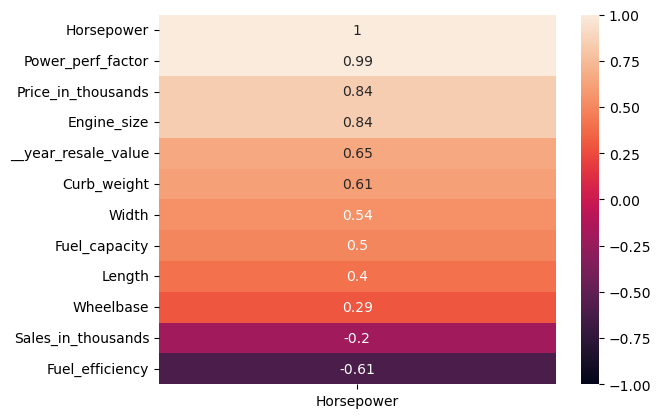

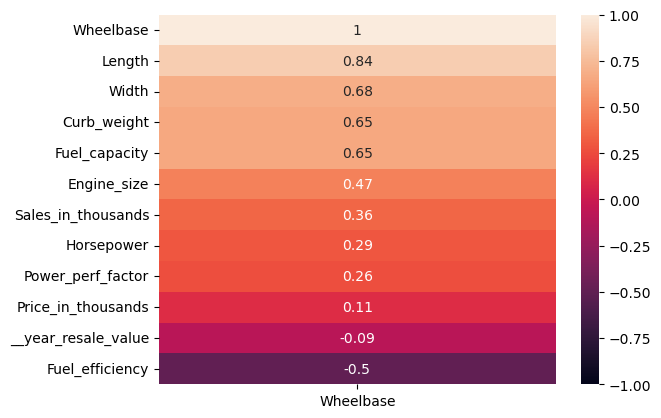

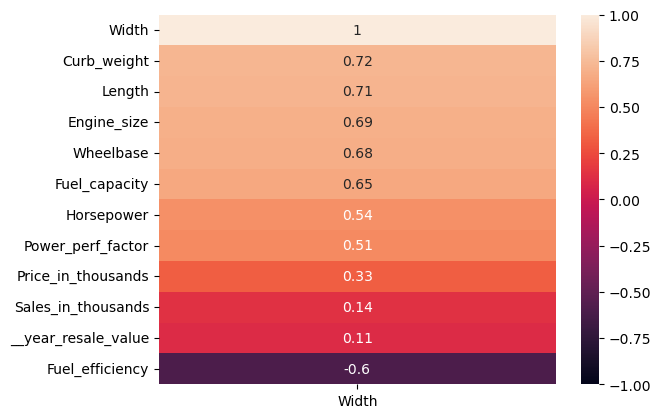

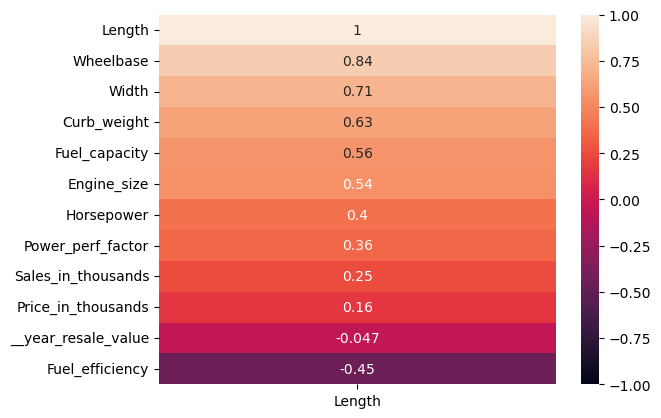

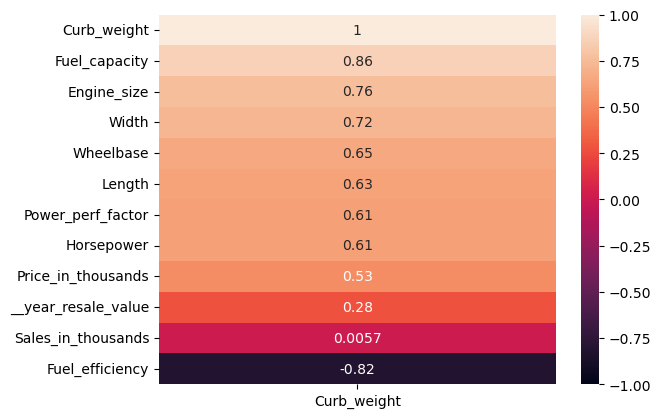

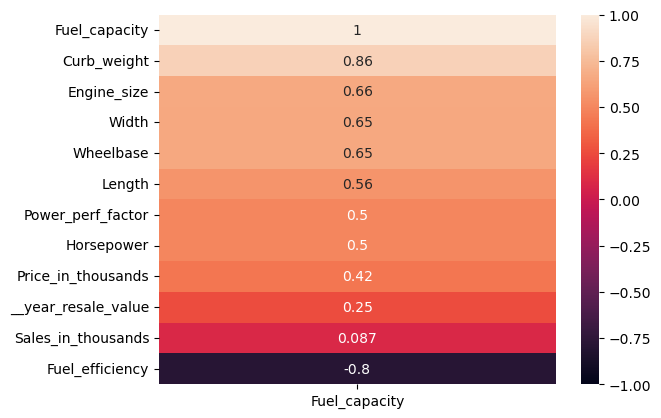

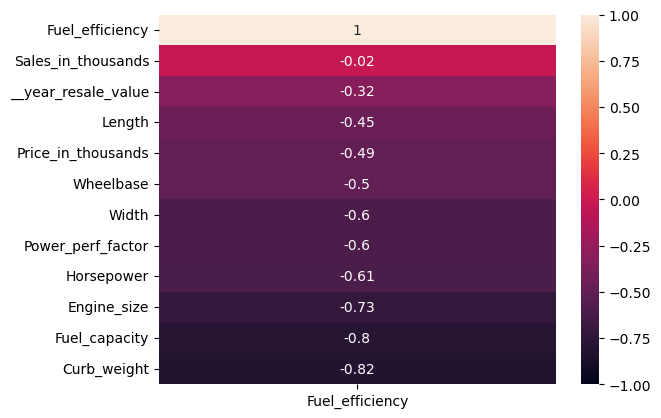

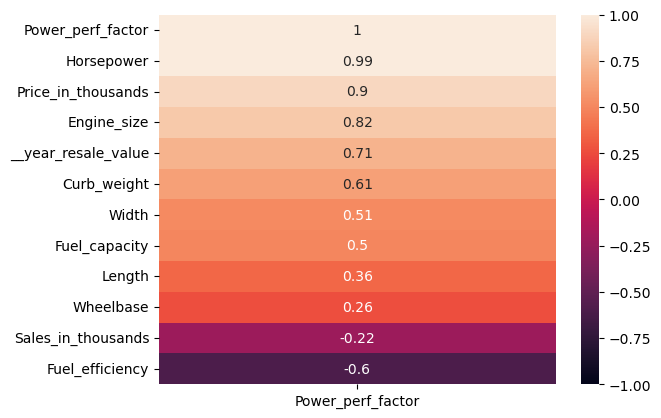

In [11]:
for i in data.columns:
    if data[i].dtype!='object':
        sns.heatmap(data.corr()[[i]].sort_values(by=i,ascending=False),vmin=-1,vmax=1,annot=True)
        plt.show()

#### Here the price in thousand is considered to be the target variable,and the feature variables are horse power,year resale value,power perft factor,engine size and curb weight.
#### Here power perft factor is correlated with horse power and engine size
#### due to multicollinearity the finalised feature variables are power perft factor,curb weight and year resale value.

### Outlier treatment

### Z_score method

In [12]:
data.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [13]:
data['z_score'] = stats.zscore(data.Price_in_thousands)

In [14]:
data = data.query('z_score<1 & z_score >-1')

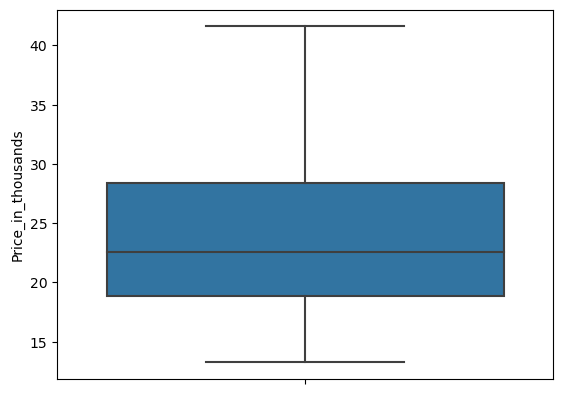

In [15]:
sns.boxplot(y='Price_in_thousands',data=data);

In [16]:
data.drop(columns=['z_score'],inplace=True)

### Cross validation

In [17]:
df = data[['Power_perf_factor','Curb_weight','__year_resale_value','Manufacturer', 'Model', 'Sales_in_thousands','Vehicle_type', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch','Price_in_thousands']]

In [18]:
x = df.iloc[:,:3].values
y = df.iloc[:,-1].values

### Feature scaling

In [19]:
rs = RobustScaler()

In [20]:
x = rs.fit_transform(x)

In [21]:
models = {
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'LinearSVR':LinearSVR(),
    'RandomForestRegressor':RandomForestRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),    
}


In [22]:
for name,model in models.items():
    score = cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv=10,n_jobs=-1)
    print('Cross validation model: ',format(name))
    rmse = np.sqrt(-score)
    avg_rmse = np.mean(rmse)
    print('RMSE :',avg_rmse)
    print('*'*100)

Cross validation model:  LinearRegression
RMSE : 2.695220632534505
****************************************************************************************************
Cross validation model:  Ridge
RMSE : 2.697839042574912
****************************************************************************************************
Cross validation model:  Lasso
RMSE : 3.098786185700079
****************************************************************************************************
Cross validation model:  LinearSVR
RMSE : 2.8093188195507923
****************************************************************************************************
Cross validation model:  RandomForestRegressor
RMSE : 3.074078205310875
****************************************************************************************************
Cross validation model:  AdaBoostRegressor
RMSE : 3.4015492146169657
****************************************************************************************************
Cross validat

In [23]:
model = LinearRegression()

In [24]:
sc = StandardScaler()

In [25]:
x = sc.fit_transform(x) 

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [27]:
model.fit(x_train,y_train)

LinearRegression()

In [28]:
training_score = model.score(x_train,y_train)*100
testing_score = model.score(x_test,y_test)*100
y_pred = model.predict(x_test)
r2_score = r2_score(y_test,y_pred)*100
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print('Training score',training_score)
print('Testing score',testing_score)
print('r2 score',r2_score)
print('MSE',mse)
print('MAE',mae)

Training score 86.15876742072918
Testing score 86.5247929932354
r2 score 86.5247929932354
MSE 6.045512180849219
MAE 2.0201377069504445


In [29]:
output = pd.DataFrame(zip(y_test,y_pred),columns=['Actual','Predicted'])
output

,Actual,Predicted
0,19.390,21.670593
1,26.935,27.778556
2,20.550,21.055094
3,25.345,24.214448
4,33.950,30.367780
5,17.885,18.338542
6,24.997,27.438393
7,26.100,30.397206
8,22.505,24.419389
9,31.505,32.673655


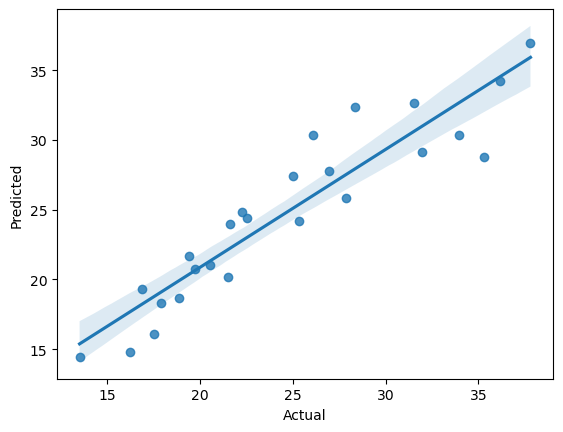

In [30]:
sns.regplot(x='Actual',y='Predicted',data=output);

In [31]:
rs= RobustScaler()

In [32]:
x  = rs.fit_transform(x)

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [34]:
models = {
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'LinearSVR':LinearSVR(),
    'RandomForestRegressor':RandomForestRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),    
}


In [35]:
for name,model in models.items():
    model.fit(x_train,y_train)
    training_score = model.score(x_train,y_train)*100
    testing_score = model.score(x_test,y_test)*100
    y_pred1 = model.predict(x_test)
    #score = r2_score(y_test, y_pred1)
    mse = mean_squared_error(y_test,y_pred1)
    mae = mean_absolute_error(y_test,y_pred1)
    print('model trained with {} '.format(name))
    print('Training score',training_score)
    print('Testing score',testing_score)
    #print('r2 score',score)
    print('MSE',mse)
    print('MAE',mae)
    print('RMSE :',avg_rmse)
    print('*'*100)

model trained with LinearRegression 
Training score 86.15876742072918
Testing score 86.52479299323538
MSE 6.0455121808492205
MAE 2.0201377069504445
RMSE : 4.278261397806821
****************************************************************************************************
model trained with Ridge 
Training score 86.13200077124566
Testing score 86.9539632935508
MSE 5.852969366708171
MAE 1.984408801893557
RMSE : 4.278261397806821
****************************************************************************************************
model trained with Lasso 
Training score 82.22622210814332
Testing score 82.48428657943275
MSE 7.858243571853517
MAE 2.249372036559431
RMSE : 4.278261397806821
****************************************************************************************************
model trained with LinearSVR 
Training score 83.78576459169611
Testing score 87.06463451882342
MSE 5.803317866726078
MAE 1.7586986061107908
RMSE : 4.278261397806821
****************************************

#### Linear regression model is obtained as the best model.Because it have similar training score and testing score also less rmse.Predictions also accurate.